In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv("laptopPrice.csv",encoding='latin-1' )
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [7]:
df[['ram_gb','weight']].sample(5)

,ram_gb,weight
121,4 GB,Casual
119,4 GB,Casual
90,8 GB,Casual
237,8 GB,Casual
706,4 GB,Casual


In [8]:
df['ram_gb'] = df['ram_gb'].str.replace(' GB','')
df['ram_gb'] = df['ram_gb'].astype(int)

df.rename(columns={'weight':'category'},inplace=True)

df['graphic_card_gb'] = df['graphic_card_gb'].str.replace(' GB','').astype(int)
df['ssd'] = df['ssd'].str.replace(' GB','').astype(int)
df['hdd'] = df['hdd'].str.replace(' GB','').astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    int64 
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    int64 
 7   hdd                823 non-null    int64 
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    int64 
 11  category           823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [10]:
brand_prices = df.groupby('brand')['Price'].mean().sort_values(ascending=False)
brand_prices

,Price
brand,
APPLE,151707.857143
MSI,98713.020000
ASUS,78937.602410
HP,73640.272059
Lenovo,72920.208333
acer,72420.039216
Avita,65157.428571
DELL,60934.662252


In [11]:
ram_prices = df.groupby('ram_gb')['Price'].mean().sort_values()
ram_prices

,Price
ram_gb,
4,60080.991150
8,66696.248804
16,119909.406780
32,239990.000000


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

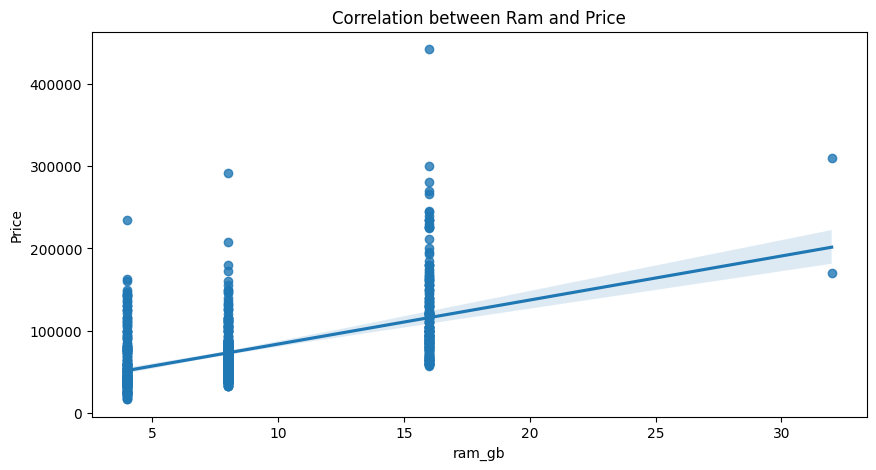

In [17]:
plt.figure(figsize=(10,5))
sns.regplot(x=df['ram_gb'],y=df['Price'],)
plt.title("Correlation between Ram and Price")
plt.show()

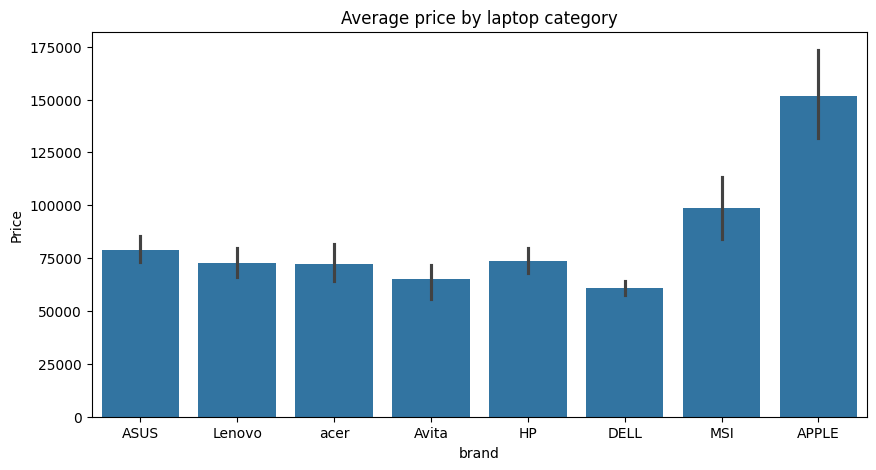

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['brand'],y=df['Price'])
plt.title("Average price by laptop category")
plt.show()